Basic Plotting with Matplotlib

You can show matplotlib figures directly in the notebook by using the %matplotlib notebook and %matplotlib inline magic commands.
%matplotlib notebook provides an interactive environment.

Note: type hint autocompletion in the Jupyter Notebook; use this to help you find the functions that you're looking for.
On lenux, gtk is backend. x horizontal; y 
Artist layer: collections, polygons, lines,
Matplotlib Architecture:
Backend layer: rendering of plots to screen or files, in Jupyter, use inline backend. ~Artist Layer: contains containers such as figure, subplot, axes; contains primitives, ie Line2D, Rectangle,collections, ie PathCollection. Scripting Layer:helps simplify/speed up. pyplot: creates and choreographs layers.
Also declarative ways: html; formated as DOM, document object model. d3.gs: declarative
pyplot: procedural. http://www.aosabook.org/en/matplotlib.html

In [1]:
%matplotlib %notebook

In [2]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [3]:
#scripting layer
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


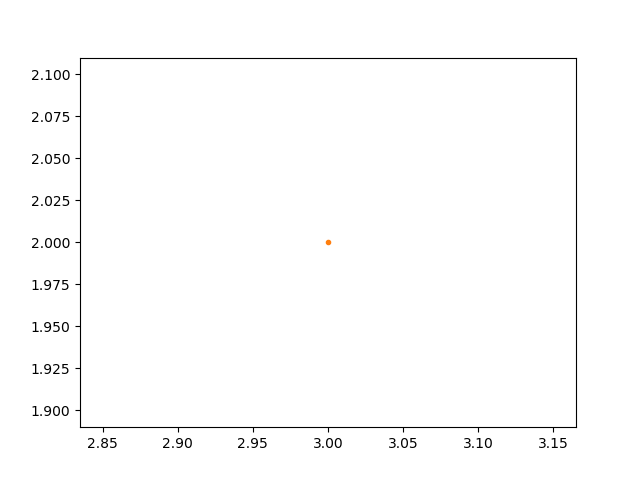

In [4]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

In [5]:
# We must pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer. The scripting layer does several steps for us automatically, therefore we will have to do some additional steps without it, like save the figure to a .png

In [6]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig; 111 means one plot
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [7]:
%%html
<img src='test.png' />

ENOUGH NON-SCRIPTING!  BACK TO SCRIPTING we STARTED AT 
TOP OF PAGE W pyplot as plt. Lets create a new figure

<IPython.core.display.Javascript object>


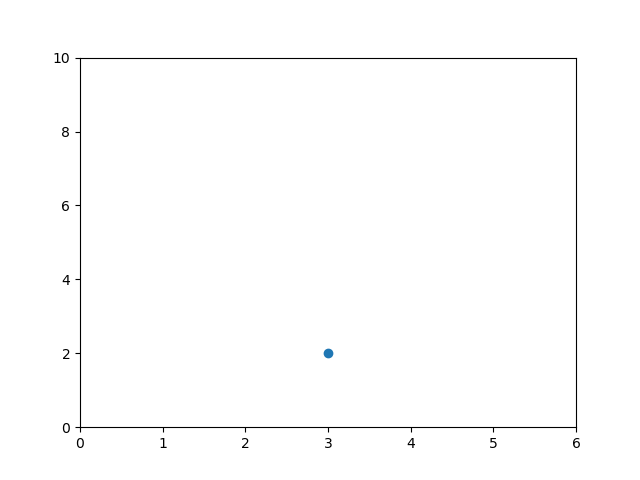

[0, 6, 0, 10]

In [8]:
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes gca (gcf get current figure of pyplot)
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


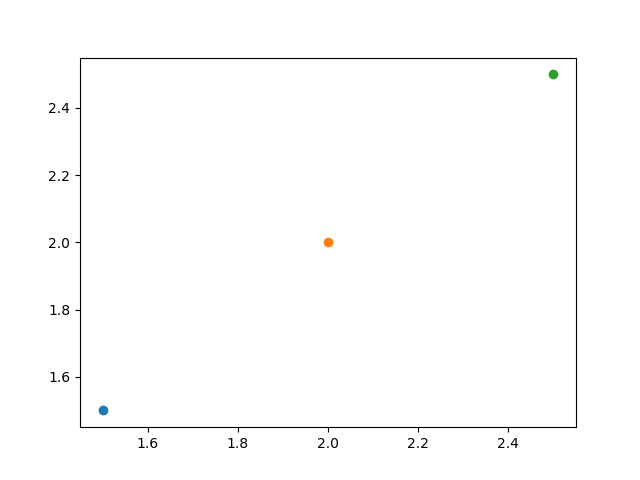

In [9]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

The output, below, tells us all the children: three line to the objects contained in this axis, these are our data points. A number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the axes

In [10]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()


 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

Scatterplots:

<IPython.core.display.Javascript object>


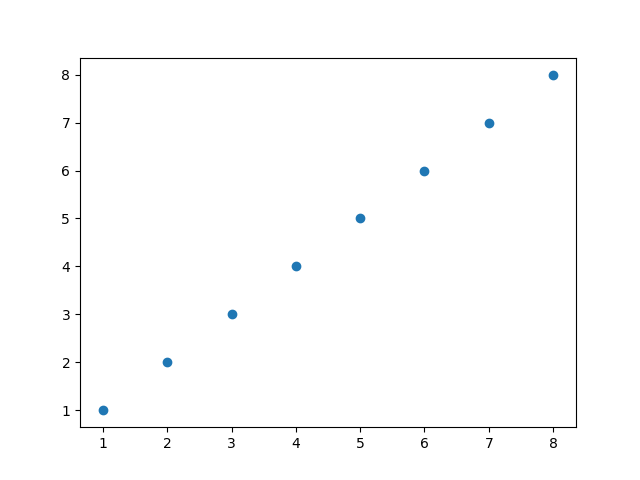

In [11]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()#creates a new figure; x&y coordinates set to fit
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

To ad color/size/etc, you need to do it seperately to the points in the list via lambdas or zip.



<IPython.core.display.Javascript object>


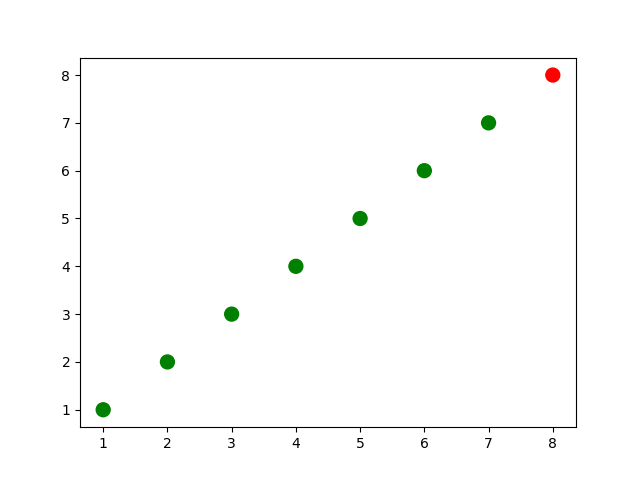

In [12]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

Zip function:takes a number of iterables and creates tuples out of them, matching elements based on index.~So if we have two lists of numbers, zip will take the first from each and create a tuple, then the second from each and create a tuple, and so on. Also remember that zip has lazy evaluation because it's actually a generator in Python 3 which means we need to use the list function if we want to see the results of iterating over zip.

In [13]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [14]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


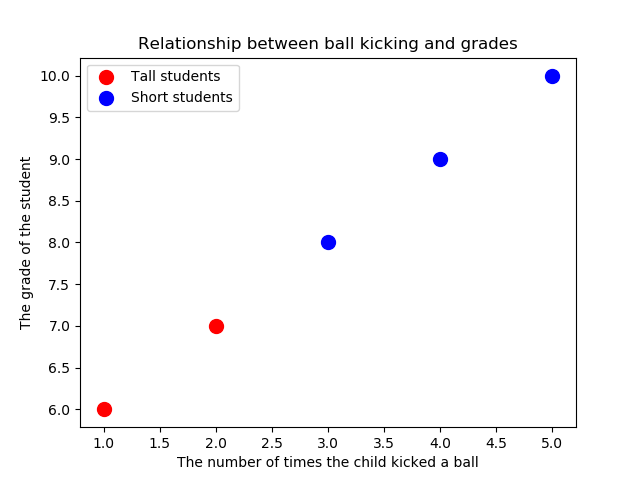

In [15]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [16]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

Text(0.5, 1, 'Relationship between ball kicking and grades')

In [17]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [18]:
# add the legend to loc=4 (the lower 
#right hand corner), also gets rid of 
#the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [19]:
# get children from current axes 
#(the legend is the second to last item in this list)
plt.gca().get_children()

 Text(0.5, 1, 'Relationship between ball kicking and grades'),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

In [20]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [21]:
# you can use get_children to navigate 
#through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [22]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to 
#see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((0, 0), width=1, height=1)


Line Plots: created w plot function.

Note:
1.First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots.
2.Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.(AUTO LABELS COLORS IN LINE/POINTS)

<IPython.core.display.Javascript object>


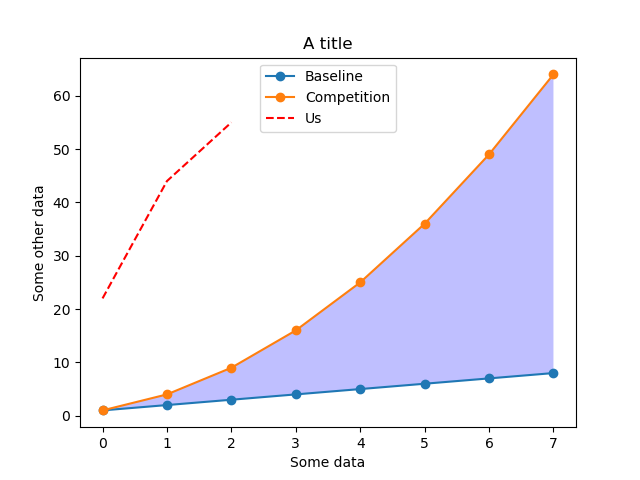

In [23]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data, -o for dots
plt.plot(linear_data, '-o', exponential_data, '-o')
#Great way to show the standard deviation 
#of results or error bars.

In [24]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [25]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [26]:
# fill the area between the linear data and exponential data
#alpha .25 is transparancy
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!
The NumPy arrange function which you saw previously is really helpful at sampling some dates for us. We can ask 
for an arrangement of dates at daily intervals just by providing the start and end dates.

<IPython.core.display.Javascript object>


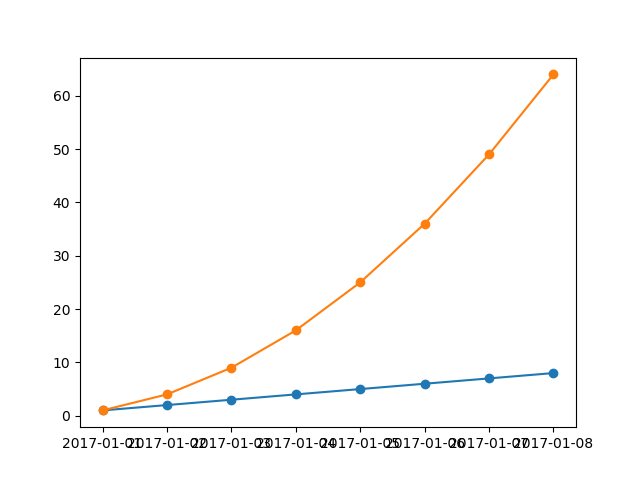

In [27]:
#This won't work! See below
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Let's try using pandas.
The solution I'm going to use here comes from a helper library in Pandas called to datetime. This specifically converts NumPy dates into standard library dates which is what matplotlib is expecting.

<IPython.core.display.Javascript object>


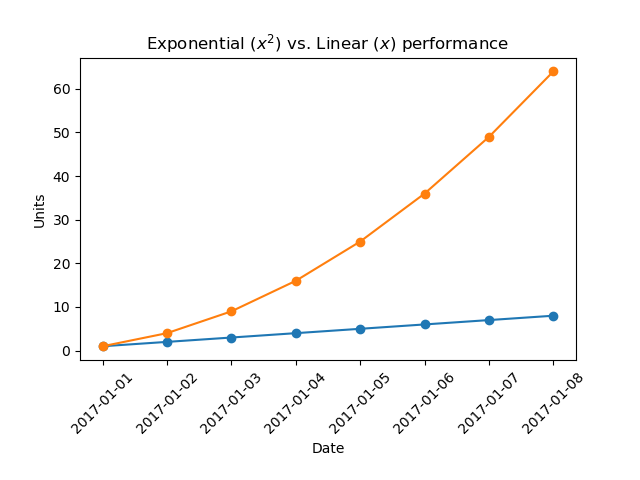

/Users/margaretcatherman/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [29]:
import pandas as pd


plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [30]:
#Can get artistic functions from x axis. Here,
#we'll rotate teh tick labels
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [31]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)


ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

Text(0.5, 1, 'Exponential vs. Linear performance')

Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX directly in your labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs. (THis is w/o installing LaTeX: ininstalling it allows for evern more options.

In [32]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

Text(0.5, 1, 'Exponential ($x^2$) vs. Linear ($x$) performance')

Bar Charts
1. Matplotlib has support for several kinds of bar charts. The most general case, we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar. Let's do this with our linear data. Here I'm going to just create a list of values as long as our linear data list; width .3


<IPython.core.display.Javascript object>


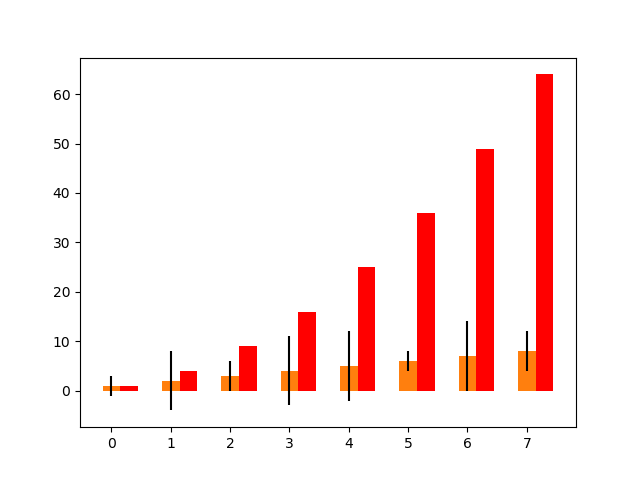

<BarContainer object of 8 artists>

In [33]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [34]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<BarContainer object of 8 artists>

So the plot looks okay, but not great. All of the x labels are to the far left of the items being described, and not centered. Now, we can center them with a given bar, using the align parameter, but it's a bit frustrating when you have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and add a new data series manually. And this gets worse, we actually have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set the bar left location appropriately.

None the less, some other nice features:

In [35]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


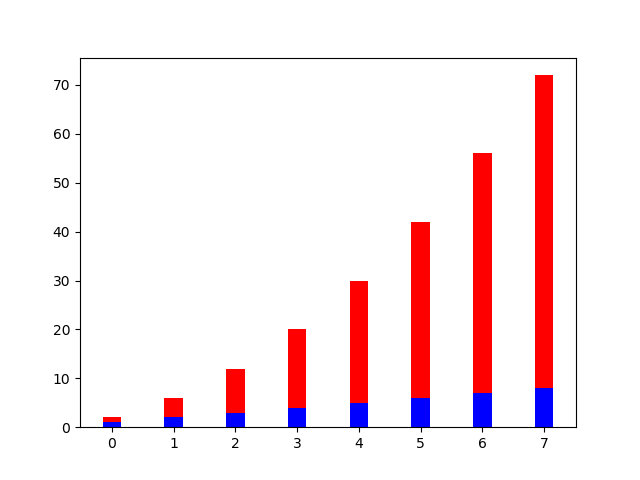

<BarContainer object of 8 artists>

In [36]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


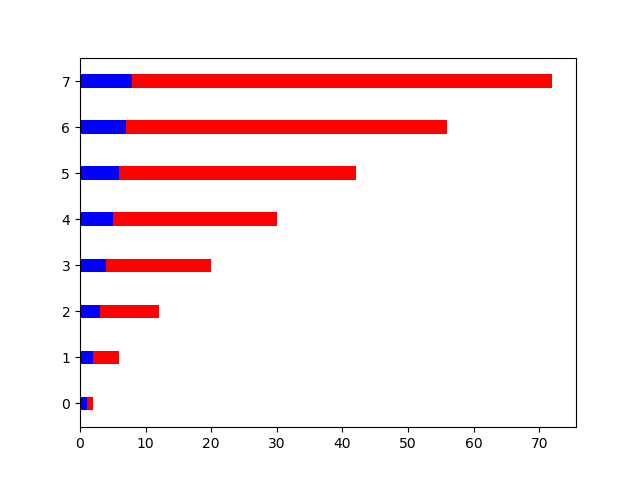

<BarContainer object of 8 artists>

In [37]:
# or use barh for horizontal bar charts/ PIVOT
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

In [ ]:
#Insert an image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

arr_lena = mpimg.imread('Lenna.png')

imagebox = OffsetImage(arr_lena, zoom=0.2)

ab = AnnotationBbox(imagebox, (0.4, 0.6))

ax.add_artist(ab)

plt.grid()

plt.draw()
plt.savefig('add_picture_matplotlib_figure.png',bbox_inches='tight')
plt.show()

In [38]:
rec_gc#to see what artist the x ases object contains


<function __main__.rec_gc(art, depth=0)>

<IPython.core.display.Javascript object>


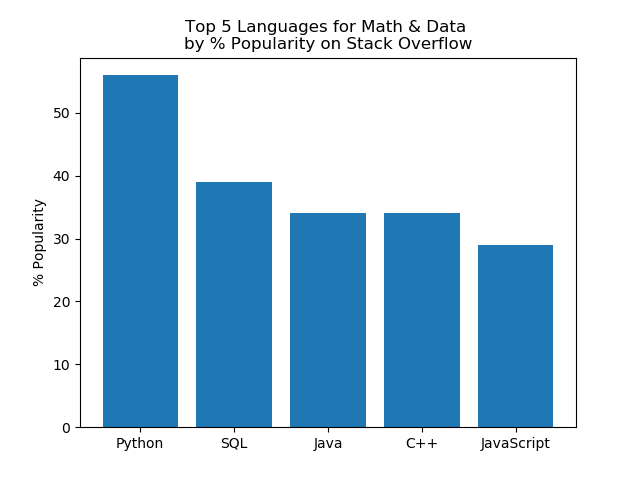

In [54]:
###CODE FROM CORSERA
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow')
 
plt.show()

<IPython.core.display.Javascript object>


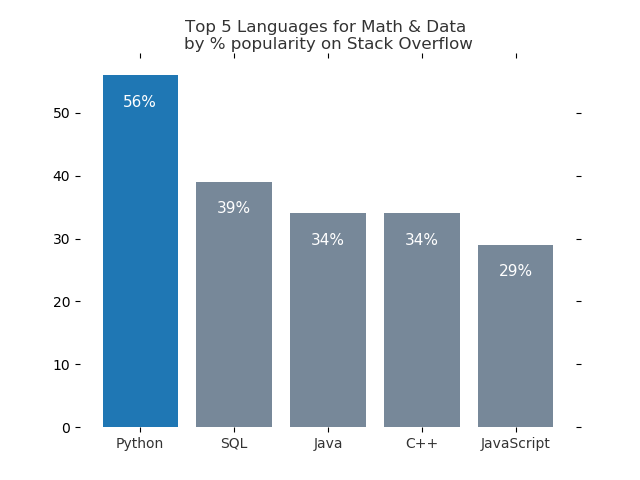

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(height)) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()